In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings

In [5]:
os.chdir('D:/Penn/Career/Citadel/2021datathon')
df_1 = pd.read_csv('team_att_all_cleaned.csv')

In [3]:
id_fts = [
    'team_id', # will be dropped during clustering
    'date', # will be dropped during clustering
    'next_date'
]

features = df.columns.values.tolist()
for id_ft in id_fts:
    features.remove(id_ft) 

print(features)

['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth', 'buildUpPlayPositioningClass_Free Form', 'buildUpPlayPositioningClass_Organised', 'chanceCreationPositioningClass_Free Form', 'chanceCreationPositioningClass_Organised', 'defenceDefenderLineClass_Cover', 'defenceDefenderLineClass_Offside Trap', 'buildUpPlayDribbling', 'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_right', 'preferred_foot_left', 'at

In [8]:
df_1 = df_1[df_1['buildUpPlayDribbling'] != 0]
df_2 = df_1.drop(['team_id', 'date', 'next_date'], axis = 1)

In [9]:
# Normalization
df_3 = pd.DataFrame(MinMaxScaler().fit_transform(df_2), columns=df_2.columns, index=df_2.index)
df_3.shape

(931, 60)

In [10]:
Nc = range(1, 51)
kmeans = [KMeans(n_clusters = n) for n in Nc]
score = np.array([kmeans[i].fit(df_3).score(df_3) for i in range(len(kmeans))])

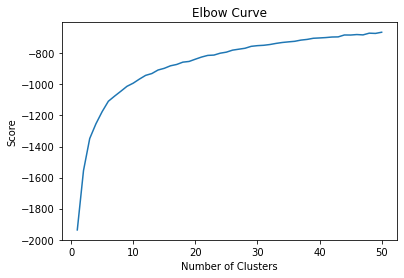

In [11]:
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# from the graph, we need 10 clusters to describe team attributes.
# TODO verify this result with other methods

In [12]:
kmeans = KMeans(n_clusters = 10)
df_1['cluster'] = kmeans.fit_predict(df_2)
df_1['cluster'].value_counts(dropna = False)

0    135
7    133
2    122
6    112
4    107
1     99
9     66
3     63
8     49
5     45
Name: cluster, dtype: int64

In [14]:
df_1.to_csv("team_att_all_w_cluster.csv")